# Monte Carlo Simulation of Scintillator and PMT for AESOP-Lite

### By Liam Branch and Robert Johnson

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [125]:
# Constants
c = 33.3564 # Speed of Light in cm / ps

In [221]:
scint_radius = 10. # cm
width_pmt_window = 4 # cm
length_pmt_window = 1 #cm
width = width_pmt_window/2
length = length_pmt_window
theta_lim = np.arcsin(width/scint_radius)
# Position of PMT
x = width/np.tan(theta_lim) # thetax_0
y = -width
print(x,y, width/np.tan(theta))
# Main Scintillator angles
theta_scint = np.linspace(theta_lim,2*np.pi-theta_lim, 100)

9.797958971132712 -2.0 9.797958971132712


In [344]:
def normalize(x):
    x /= np.linalg.norm(x)
    return x
def distance_solver(direction_vec, point_pos, center, radius): #distance given center of circle/sphere is the origin
    perp = point_pos+np.dot(np.dot(center-point_pos,direction_vec),direction_vec)
    delta = np.dot(direction_vec,center-point_pos)**2 - (np.linalg.norm(center-point_pos)**2 - radius**2)
    if delta < 0:
        print("error: delta<0 so no ray intersection point!")
        print(f"delta={delta} direction={direction_vec} point_pos={point_pos} radius={radius}")
        return 0
    else:
        distanceA = -np.dot(direction_vec,point_pos)+np.sqrt(delta)
        distanceB = -np.dot(direction_vec,point_pos)-np.sqrt(delta)
        
        return distanceB #if abs(distanceA) >= abs(distanceB) else distanceB
def scintillator_monte_carlo(x_0, y_0, E, scint_radius, N_max, dt):
    print(f"Starting position (x_0,y_0) = ({x_0:.2f},{y_0:.2f})")
    track_history = np.zeros((N_max+1,2))     # x, y history of Photon
    x, y = (x_0, y_0)
    o = np.array([x_0, y_0])
    track_history[0] = [x,y]
    i = 1
    while i < N_max+1:
        theta = random.uniform(0,2*np.pi)   # first direction of photon
        u = np.array([np.cos(theta),np.sin(theta)]) # direction unit vector
#         normal_to_plane = np.dot(u, (0,0))
        o = np.array([x, y])
        ds = distance_solver(u, o, scint_radius)
        x, y = (ds*u)
        dt = c/ds if ds>1e-9 else float('inf')  # time taken in ps traveling in direction theta
        print(f"step {i}: theta_i={theta/(np.pi):.2f}π ds={ds:.2f} dt={dt:.2f} x_0y_0= ({x_0:.2f},{y_0:.2f}) xy =({x:.2f},{y:.2f})")
#         theta, E = photon_reflection(theta, (x_0,y_0), (x,y),  E) # test by always fully reflecting
        track_history[i] = [x,y]
        i+=1

    return track_history

def photon_reflection(theta, cur_point, plane, n_vec, E):
    theta = -np.arccos(np.dot(theta, n_vec))
    return theta, E


# def intersect_plane(O, D, P, N):
#     # Return the distance from O to the intersection of the ray (O, D) with the 
#     # plane (P, N), or +inf if there is no intersection.
#     # O and P are 3D points, D and N (normal) are normalized vectors.
#     denom = np.dot(D, N)
#     if np.abs(denom) < 1e-6:
#         return np.inf
#     d = np.dot(P - O, N) / denom
#     if d < 0:
#         return np.inf
#     return d

Starting position (x_0,y_0) = (0.43,4.56)
step 1: theta_i=1.84π ds=-9.35 dt=inf x_0y_0= (0.43,4.56) xy =(-8.21,4.47)
step 2: theta_i=0.91π ds=-25.56 dt=inf x_0y_0= (0.43,4.56) xy =(24.60,-6.92)


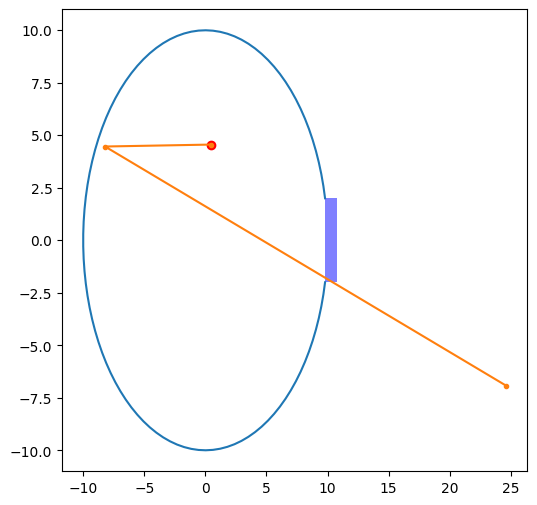

In [345]:
# Plot
fig0, ax0 = plt.subplots(figsize=(6,6))
ax0.plot(scint_radius*np.cos(theta0), scint_radius*np.sin(theta0))
r = random.uniform(0,2*np.pi)
random_track = (np.random.random()*scint_radius*np.cos(r), np.random.random()*scint_radius*np.sin(r)) # x, y
ax0.scatter(random_track[0],random_track[1], color='red', marker='o')
tracks = scintillator_monte_carlo(random_track[0],random_track[1], 100, 10, 2, 0.2)
pmt_window = plt.Rectangle((x,y), length_pmt_window, width_pmt_window, fc='blue', alpha=0.5)
ax0.add_patch(pmt_window)
ax0.plot(tracks[:,0],tracks[:,1], color='C1', marker='.')
plt.show()